In [2]:
from ising.one_dimensional.checkerboard import simulate, true_hamiltonian
import numpy as np
from ising.one_dimensional.lattice import random_lattice
from ising.visualize import line_lattices_to_images, display_experiment
import matplotlib.pyplot as plt

In [3]:
lattice = random_lattice(10_000)

In [4]:

def moving_average(array: np.array, n: int):
    """Computes the moving average with window size n of an array,
    note that the first n elements of the returned array are not
    averages of last n values."""

    assert len(array) > n, "Averaging window too large"

    ret = np.cumsum(array, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]

    partial_window = ret[: n - 1] / np.arange(1, n)
    full_window = ret[n - 1 :] / n
    return np.concatenate((partial_window, full_window), axis=0)

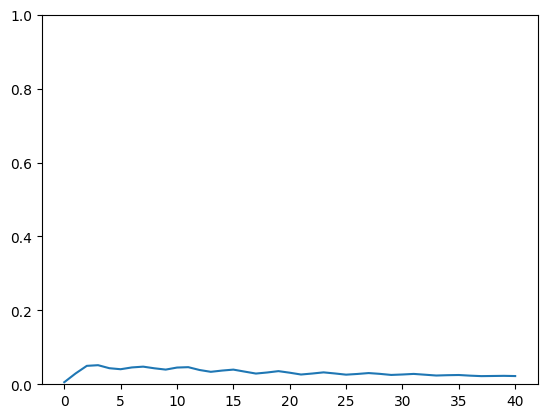

In [5]:
plt.ylim(0, 1)
plt.plot(
    np.arange(41),
    moving_average(np.average(simulate(lattice, 1, 20, 40), axis=1), 10),
)

In [6]:
def magnetization_plot():
    Ts = np.linspace(0.1, 100, 200)
    h1, h2, h3 = 1, 2, 4
    m1, m2, m3 = [], [], []
    for T in Ts:
        m1.append(
            moving_average(np.average(simulate(lattice, h1, T, 40), axis=1), 10)[-1]
        )
        m2.append(
            moving_average(np.average(simulate(lattice, h2, T, 40), axis=1), 10)[-1]
        )
        m3.append(
            moving_average(np.average(simulate(lattice, h3, T, 40), axis=1), 10)[-1]
        )

    return Ts, m1, m2, m3

In [20]:
Ts, m1, m2, m3 = magnetization_plot()

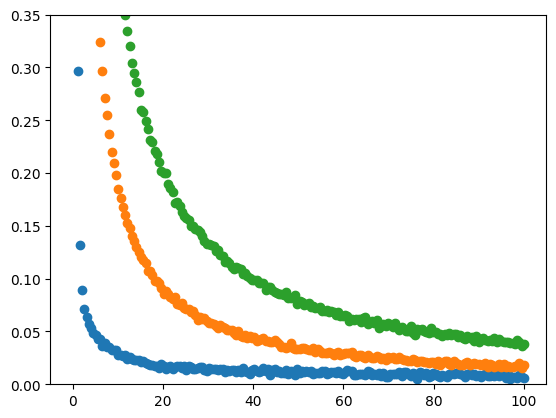

In [21]:
plt.ylim(0, 0.35)
plt.scatter(Ts, m1)
plt.scatter(Ts, m2)
plt.scatter(Ts, m3)

In [16]:
def cv_plot():
    Ts = np.linspace(2, 15, 200)
    h1, h2, h3 = 0, 10, 15
    cv1, cv2, cv3 = [], [], []
    for T in Ts:
        cv1.append(
            np.var(
                [
                    np.sum(true_hamiltonian(frame, h1))
                    for frame in simulate(lattice, h1, T, 200)
                ]
            )
            / T**2
        )
        cv2.append(
            np.var(
                [
                    np.sum(true_hamiltonian(frame, h2))
                    for frame in simulate(lattice, h2, T, 200)
                ]
            )
            / T**2
        )
        cv3.append(
            np.var(
                [
                    np.sum(true_hamiltonian(frame, h3))
                    for frame in simulate(lattice, h3, T, 200)
                ]
            )
            / T**2
        )

    return Ts, cv1, cv2, cv3

In [17]:
Ts, cv1, cv2, cv3 = cv_plot()

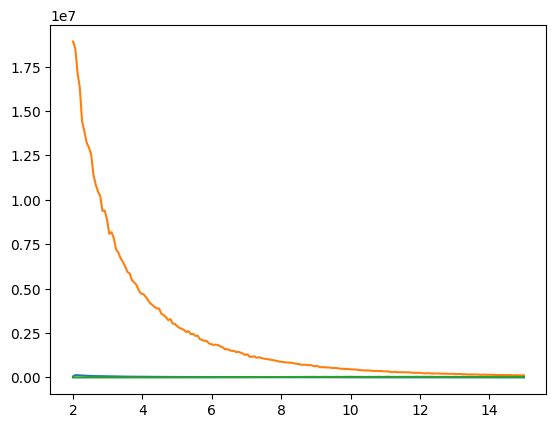

In [18]:
# plt.ylim(0, 80_000)
plt.plot(Ts, cv1)
plt.plot(Ts, cv2)
plt.plot(Ts, cv3)